In [1]:
from common_functions import *

2022-12-07 15:16:35.724920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 15:16:36.510564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-07 15:16:36.510620: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-07 15:16:36.510627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

2022-12-07 15:16:37.407141: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 15:16:37.431205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 15:16:37.431439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 15:16:37.432032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

1/1 [==============================] - 2s 2s/step
('n03272010', 'electric_guitar', 0.7049317)


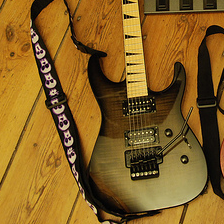

In [2]:
model = load_model();
rgb = png_to_rgb('imagenet_crops/guitar_01.png')
input_label, signed_grad = fgsm(model,rgb)
print(input_label)
show(rgb)

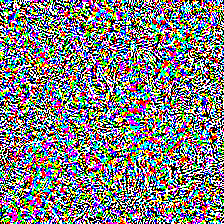

In [3]:
show_perturbation(signed_grad)

In [4]:
for bits in range(1,10):
    attacked_img = attack(rgb,signed_grad,bits)
    attacked_label, _ = fgsm(model,attacked_img)
    print(attacked_label)

adding +- 1 to image
1/1 [==============================] - 0s 24ms/step
('n03272010', 'electric_guitar', 0.03675985)
adding +- 2 to image
1/1 [==============================] - 0s 28ms/step
('n03272010', 'electric_guitar', 0.018497946)
adding +- 4 to image
1/1 [==============================] - 0s 29ms/step
('n03495258', 'harp', 0.025456103)
adding +- 8 to image
1/1 [==============================] - 0s 29ms/step
('n03272010', 'electric_guitar', 0.036957406)
adding +- 16 to image
1/1 [==============================] - 0s 28ms/step
('n03272010', 'electric_guitar', 0.061527252)
adding +- 32 to image
1/1 [==============================] - 0s 28ms/step
('n03998194', 'prayer_rug', 0.24682459)
adding +- 64 to image
1/1 [==============================] - 0s 28ms/step
('n02999410', 'chain', 0.4267672)
adding +- 128 to image
1/1 [==============================] - 0s 28ms/step
('n09229709', 'bubble', 0.1879003)
adding +- 256 to image
1/1 [==============================] - 0s 22ms/step
('n030002